# Fake News Detection - Data Exploration

This notebook performs comprehensive exploratory data analysis (EDA) on the FakeNewsNet dataset.

## Objectives
- Understand the dataset structure and characteristics
- Analyze class distribution (real vs fake news)
- Examine text features (title length, word count)
- Investigate source domain patterns
- Analyze tweet engagement metrics
- Identify data quality issues and missing values


In [2]:
# Import necessary libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Add src directory to path
# Get the project root directory (parent of notebooks directory)
current_dir = os.getcwd()
# If we're in notebooks directory, go up one level
if current_dir.endswith('notebooks'):
    project_root = os.path.dirname(current_dir)
else:
    # If we're in project root, use current directory
    project_root = current_dir

src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.insert(0, src_path)

# Debug: print paths to verify
print(f"Current directory: {current_dir}")
print(f"Project root: {project_root}")
print(f"Source path: {src_path}")
print(f"Source exists: {os.path.exists(src_path)}")
print(f"Files in src: {os.listdir(src_path) if os.path.exists(src_path) else 'N/A'}")

# Import custom utilities
from data_utils import (
    load_data, get_basic_stats, analyze_class_distribution,
    plot_class_distribution, analyze_text_length, plot_text_length_distribution,
    analyze_source_domains, plot_source_domains, analyze_tweet_distribution,
    plot_tweet_distribution, generate_wordcloud, print_summary_report
)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

print("Libraries imported successfully!")
print(f"Project root: {project_root}")
print(f"Source path added: {src_path}")

Current directory: /Users/manalaamir/Documents/Fake News Detection -NLP
Project root: /Users/manalaamir/Documents/Fake News Detection -NLP
Source path: /Users/manalaamir/Documents/Fake News Detection -NLP/src
Source exists: True
Files in src: ['data_utils.py', 'preprocessing.py']
Libraries imported successfully!
Project root: /Users/manalaamir/Documents/Fake News Detection -NLP
Source path added: /Users/manalaamir/Documents/Fake News Detection -NLP/src


## 1. Load the Dataset


In [3]:
# Load the dataset
# Use the project_root we determined earlier
data_path = os.path.join(project_root, 'data', 'raw', 'FakeNewsNet.csv')
print(f"Loading data from: {data_path}")
print(f"File exists: {os.path.exists(data_path)}")

df = load_data(data_path)

print(f"\nDataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()


Loading data from: /Users/manalaamir/Documents/Fake News Detection -NLP/data/raw/FakeNewsNet.csv
File exists: True

Dataset loaded successfully!
Shape: (23196, 5)

First few rows:


,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on 'Real Housewives of Atlanta' Reunion (Video),http://toofab.com/2017/05/08/real-housewives-atlanta-kandi-burruss-rape-phaedra-parks-porsha-wil...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carpet looks,https://www.today.com/style/see-people-s-choice-awards-red-carpet-looks-t141832,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'One Tree Hill' Co-Star Hilarie Burton: 'Breyton 4eva',https://www.etonline.com/news/220806_sophia_bush_sends_sweet_birthday_message_to_one_tree_hill_c...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inappropriate relationship with AUNT,https://www.dailymail.co.uk/news/article-3365543/Colombian-music-star-sparks-rumours-inappropria...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Siders Shocked the World and Changed Pop Culture Forever,https://www.zerchoo.com/entertainment/gossip-girl-10-years-later-how-upper-east-siders-shocked-t...,www.zerchoo.com,38,1


## 2. Basic Dataset Information


In [4]:
# Get basic statistics
stats = get_basic_stats(df)
print_summary_report(df, label_col='real')


DATASET SUMMARY REPORT

Total Records: 23,196
Total Features: 5
Memory Usage: 8.50 MB

--------------------------------------------------------------------------------
CLASS DISTRIBUTION
--------------------------------------------------------------------------------
Real News (1): 17,441 (75.19%)
Fake News (0): 5,755 (24.81%)
Balance Ratio: 0.330 (1.0 = perfectly balanced)

--------------------------------------------------------------------------------
MISSING VALUES
--------------------------------------------------------------------------------
title: No missing values
news_url: 330 (1.42%)
source_domain: 330 (1.42%)
tweet_num: No missing values
real: No missing values

--------------------------------------------------------------------------------
DATA TYPES
--------------------------------------------------------------------------------
title: object
news_url: object
source_domain: object
tweet_num: int64
real: int64



In [5]:
# Display column information
print("Column Information:")
print(df.info())
print("\n" + "="*80)
print("\nSample data:")
df.sample(5)


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  22866 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB
None


Sample data:


,title,news_url,source_domain,tweet_num,real
924,Macklemore Reveals His Second Daughter's Birth Date — and Her Animal-Inspired Name,https://people.com/parents/macklemore-baby-girl-name-birthdate/,people.com,32,1
9505,Rep. Michael McCaul (R-TX) Appears on Face the Nation,http://us3.campaign-archive1.com/?u=468d5dc43334640650b81443f&id=711f7c7ca0&e=6d7cef570b,us3.campaign-archive1.com,21182,1
15519,Katharine McPhee celebrates David Foster's birthday amid dating rumors,https://www.upi.com/Katharine-McPhee-celebrates-David-Fosters-birthday-amid-dating-rumors/164150...,www.upi.com,18,1
21650,"The 100 boss breaks down season 5 finale, why it was time to say goodbye to [SPOILER]",https://ew.com/tv/2018/08/07/the-100-season-5-finale-postmortem-new-planet-monty/,ew.com,68,1
15462,'Full House' reunion! Bob Saget and Ashley Olsen join forces for a good cause,https://www.today.com/popculture/full-house-reunion-bob-saget-ashley-olsen-join-forces-good-t119813,www.today.com,51,1


## 3. Class Distribution Analysis


In [6]:
# Analyze class distribution
class_stats = analyze_class_distribution(df, label_col='real')
print("Class Distribution Statistics:")
print(f"Real News (1): {class_stats['counts'].get(1, 0):,} articles ({class_stats['proportions'].get(1, 0):.2f}%)")
print(f"Fake News (0): {class_stats['counts'].get(0, 0):,} articles ({class_stats['proportions'].get(0, 0):.2f}%)")
print(f"Balance Ratio: {class_stats['balance_ratio']:.3f}")
print(f"\n{'Balanced dataset' if class_stats['balance_ratio'] > 0.8 else 'Imbalanced dataset - may need balancing techniques'}")


Class Distribution Statistics:
Real News (1): 17,441 articles (75.19%)
Fake News (0): 5,755 articles (24.81%)
Balance Ratio: 0.330

Imbalanced dataset - may need balancing techniques


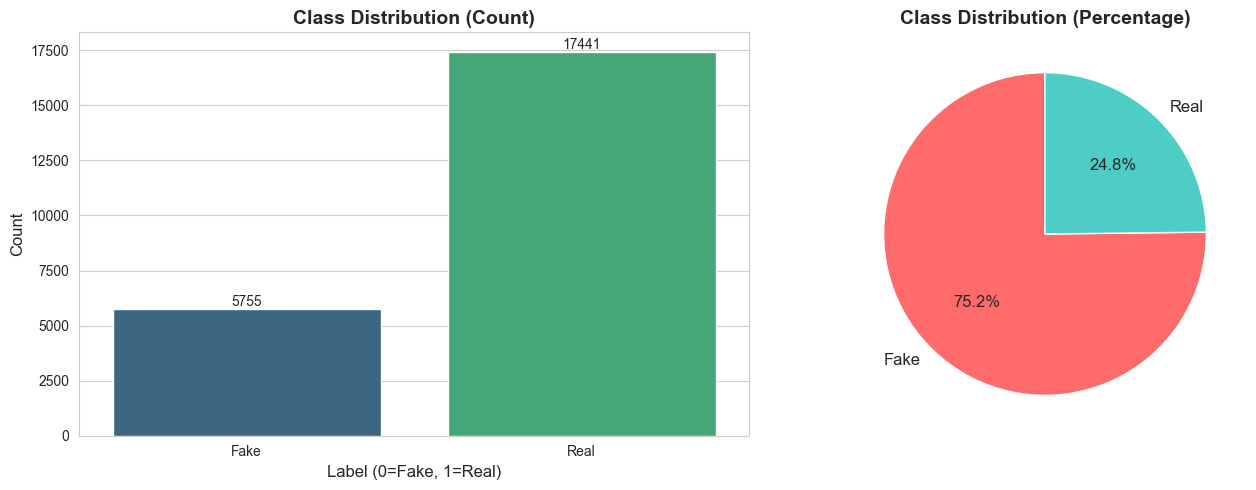

In [7]:
# Visualize class distribution
plot_class_distribution(df, label_col='real')


In [8]:
# Analyze text length statistics
text_stats = analyze_text_length(df, text_col='title', label_col='real')
print("Text Length Statistics by Class:")
print(text_stats)


Text Length Statistics by Class:
     text_length                        word_count                     
            mean median    std min  max       mean median   std min max
real                                                                   
0          68.83   69.0  23.84  10  200      11.11   11.0  4.03   1  38
1          68.13   68.0  23.10  10  340      11.18   11.0  3.96   1  53


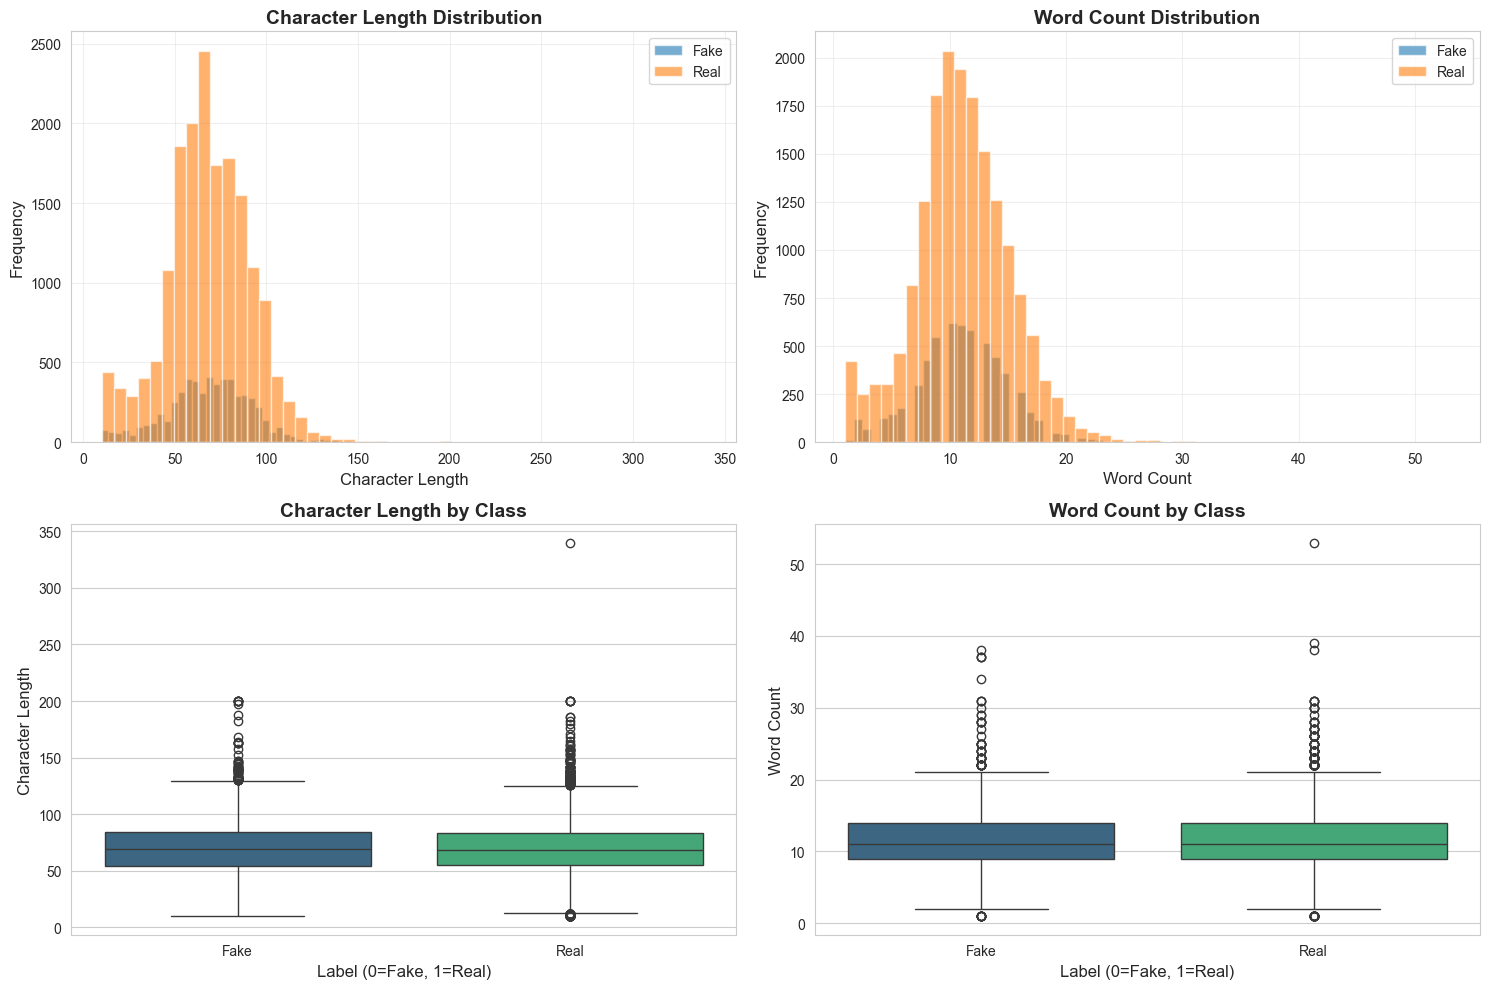

In [9]:
# Visualize text length distribution
plot_text_length_distribution(df, text_col='title', label_col='real')


## 5. Source Domain Analysis


In [10]:
# Analyze top source domains
top_domains = analyze_source_domains(df, source_col='source_domain', label_col='real', top_n=20)
print("Top 20 Source Domains:")
print(top_domains)


Top 20 Source Domains:
                           Fake  Real  Total
source_domain                               
people.com                  216  1570   1786
www.dailymail.co.uk         194   770    964
en.wikipedia.org            123   618    741
www.usmagazine.com          147   562    709
www.etonline.com             81   585    666
www.longroom.com              0   549    549
hollywoodlife.com           460    64    524
www.usatoday.com             32   300    332
www.hollywoodreporter.com    32   298    330
variety.com                  45   259    304
ew.com                       41   214    255
www.elle.com                 51   154    205
web.archive.org              69   135    204
www.billboard.com            33   164    197
www.today.com                15   180    195
www.msn.com                  74   120    194
radaronline.com             174    18    192
time.com                     27   155    182
www.thewrap.com              15   162    177
deadline.com                 15 

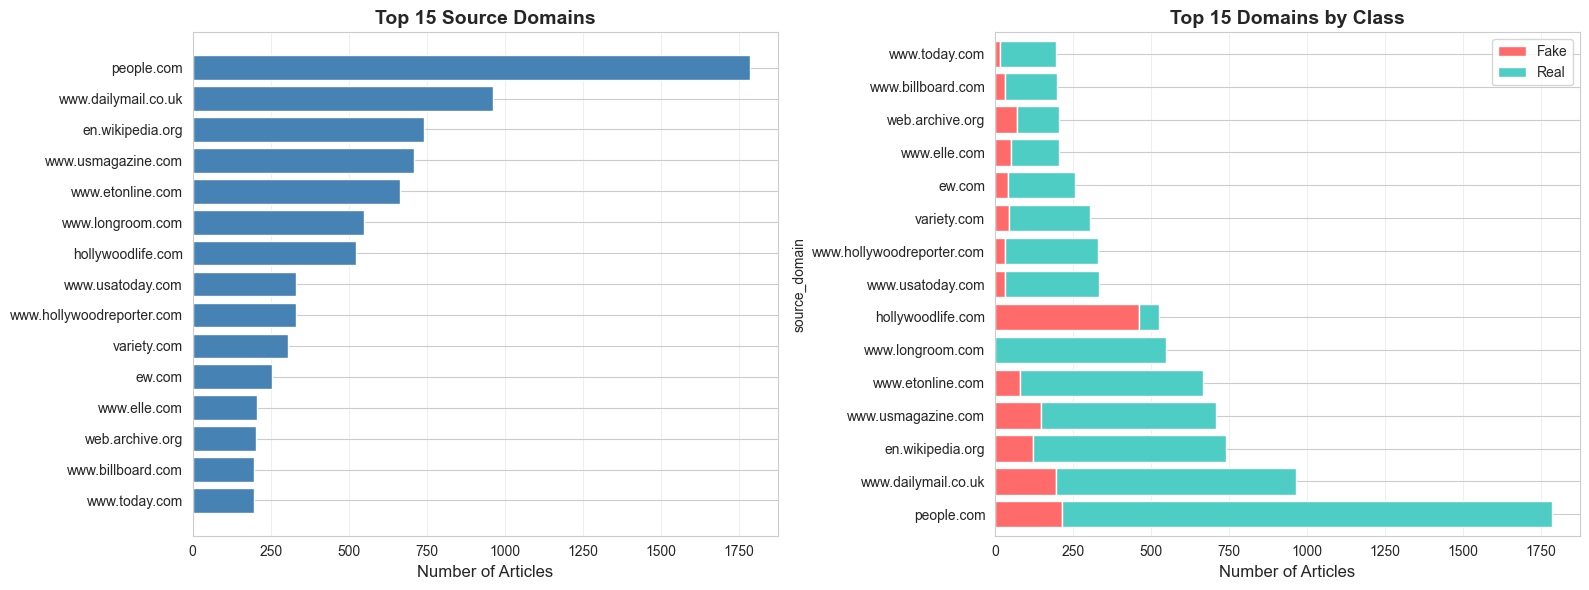

In [11]:
# Visualize source domains
plot_source_domains(df, source_col='source_domain', label_col='real', top_n=15)


## 6. Tweet Engagement Analysis


In [12]:
# Analyze tweet distribution
tweet_stats = analyze_tweet_distribution(df, tweet_col='tweet_num', label_col='real')
print("Tweet Number Statistics by Class:")
print(tweet_stats)


Tweet Number Statistics by Class:
        mean  median     std  min    max      sum
real                                             
0     132.69    13.0  548.21    0  29060   763651
1      74.53    44.0  466.51    0  27377  1299791


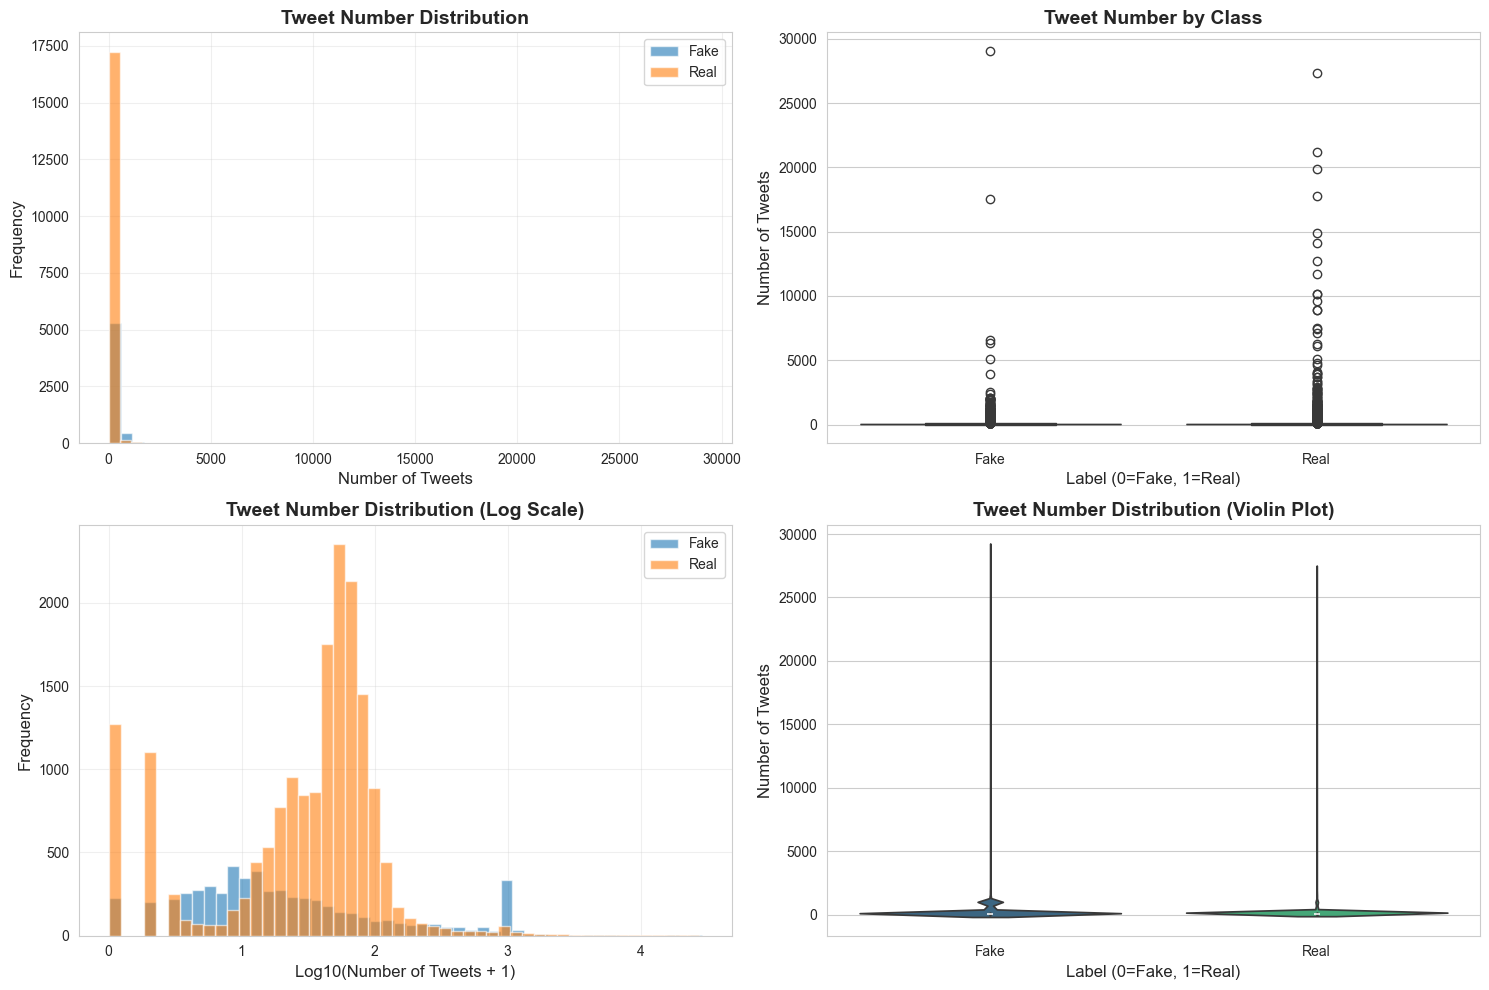

In [13]:
# Visualize tweet distribution
plot_tweet_distribution(df, tweet_col='tweet_num', label_col='real')


## 7. Word Cloud Analysis


Word Cloud for Real News:


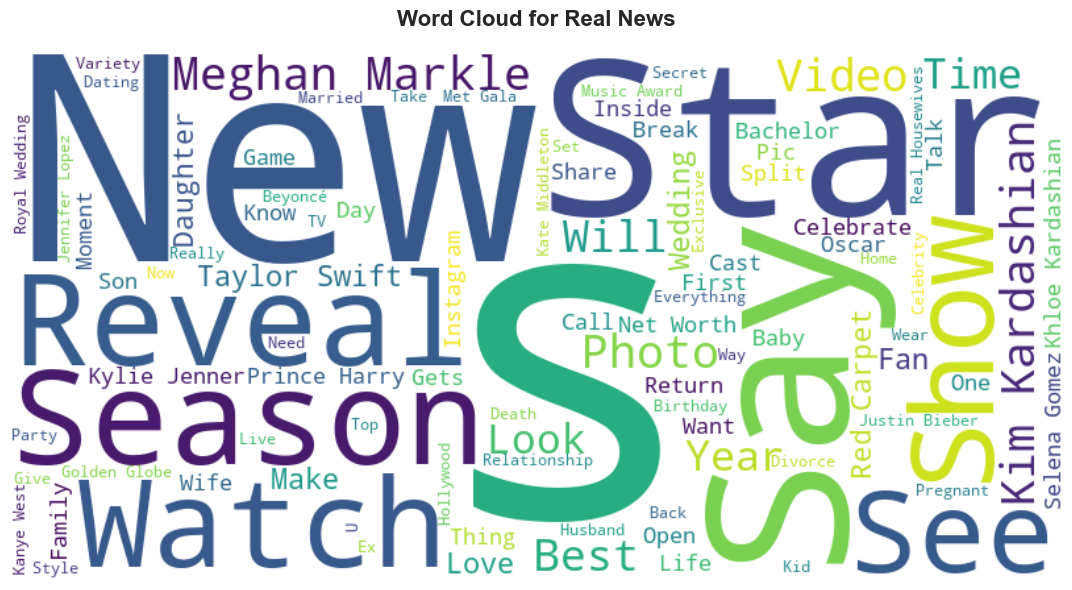

In [14]:
# Generate word cloud for Real News
print("Word Cloud for Real News:")
generate_wordcloud(df, text_col='title', label_col='real', label_value=1)


Word Cloud for Fake News:


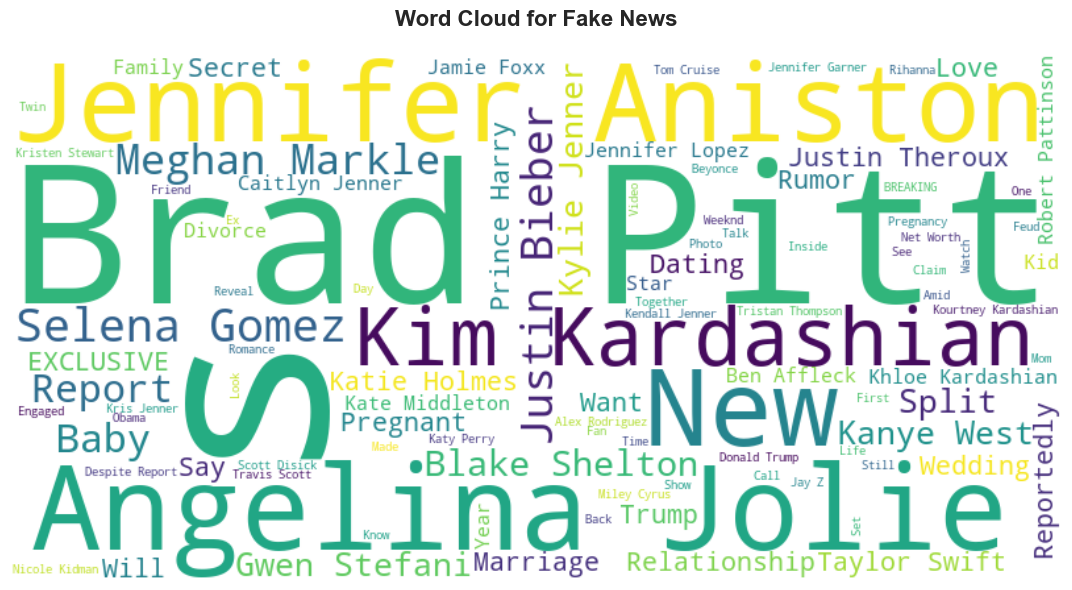

In [15]:
# Generate word cloud for Fake News
print("Word Cloud for Fake News:")
generate_wordcloud(df, text_col='title', label_col='real', label_value=0)


## 8. Missing Values Analysis


Missing Values Summary:
               Missing Count  Percentage
news_url                 330    1.422659
source_domain            330    1.422659


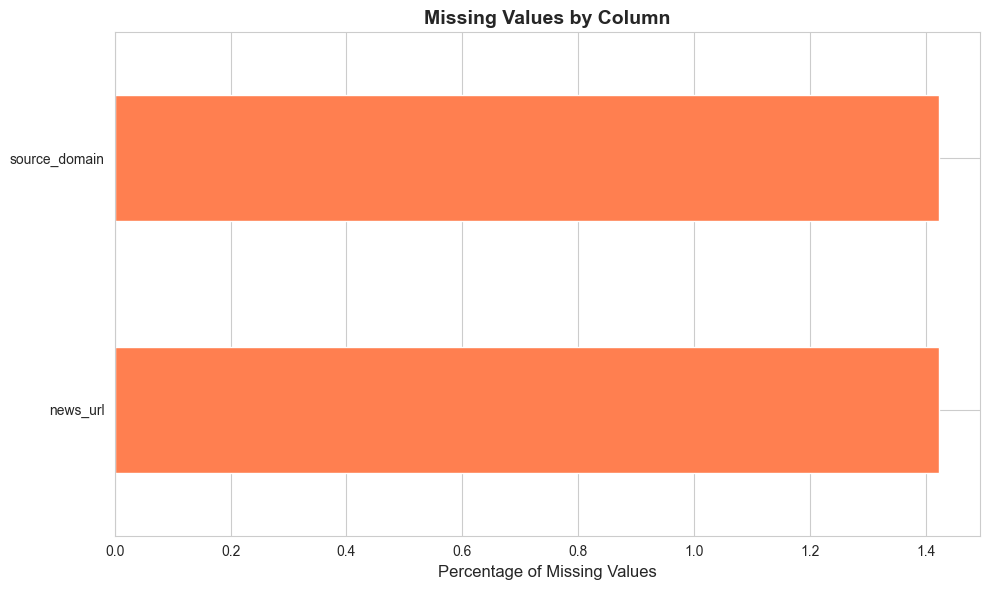

In [16]:
# Check for missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("Missing Values Summary:")
    print(missing_df)
    
    # Visualize missing values
    plt.figure(figsize=(10, 6))
    missing_df['Percentage'].plot(kind='barh', color='coral')
    plt.xlabel('Percentage of Missing Values', fontsize=12)
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")


## 9. Key Insights and Conclusions

### Summary of Findings:
1. **Dataset Size**: Total number of articles and features
2. **Class Balance**: Distribution of real vs fake news
3. **Text Characteristics**: Average title length and word count differences between classes
4. **Source Patterns**: Most common source domains and their class distribution
5. **Engagement Metrics**: Tweet distribution patterns
6. **Data Quality**: Missing values and data completeness

### Next Steps:
- Proceed to preprocessing notebook to clean and prepare data for modeling


In [17]:
# Final summary
print("="*80)
print("EXPLORATORY DATA ANALYSIS COMPLETE")
print("="*80)
print(f"\nDataset ready for preprocessing!")
print(f"Total samples: {len(df):,}")
print(f"Features: {list(df.columns)}")
print(f"\nProceed to 02_preprocessing.ipynb for data cleaning and feature engineering.")


EXPLORATORY DATA ANALYSIS COMPLETE

Dataset ready for preprocessing!
Total samples: 23,196
Features: ['title', 'news_url', 'source_domain', 'tweet_num', 'real']

Proceed to 02_preprocessing.ipynb for data cleaning and feature engineering.


## 10. Final Summary of Findings

### Executive Summary
This exploratory data analysis examined 23,196 news articles from the FakeNewsNet dataset to understand patterns, distributions, and characteristics that distinguish real from fake news. The analysis reveals several important insights that will guide the modeling approach.


### 1. Dataset Overview
- **Total Records**: 23,196 news articles
- **Features**: 5 columns (title, news_url, source_domain, tweet_num, real)
- **Memory Usage**: 8.50 MB
- **Data Quality**: Generally good, with minimal missing values (1.42% in news_url and source_domain)


### 2. Class Distribution (Critical Finding)
- **Real News (1)**: 17,441 articles (75.19%)
- **Fake News (0)**: 5,755 articles (24.81%)
- **Balance Ratio**: 0.330 (1.0 = perfectly balanced)

**Key Insight**: The dataset is **highly imbalanced** (3:1 ratio). This is a critical finding that requires attention during modeling:
- Need to use class balancing techniques (SMOTE, undersampling, or class weights)
- Consider stratified sampling for train/test splits
- Use appropriate evaluation metrics (F1-score, precision, recall) rather than just accuracy
- Real news dominates the dataset, which may bias models toward predicting "real"


### 3. Text Characteristics (Title Analysis)

**Character Length:**
- Fake News: Mean = 68.83 chars, Median = 69, Std = 23.84, Range = 10-200
- Real News: Mean = 68.13 chars, Median = 68, Std = 23.10, Range = 10-340

**Word Count:**
- Fake News: Mean = 11.11 words, Median = 11, Std = 4.03, Range = 1-38
- Real News: Mean = 11.18 words, Median = 11, Std = 3.96, Range = 1-53

**Key Insight**: Title length and word count are **very similar** between real and fake news. This suggests:
- Text length alone is not a strong distinguishing feature
- Need to focus on semantic content, word choice, and linguistic patterns
- Advanced NLP techniques (word embeddings, transformers) will be crucial
- Punctuation patterns, sentiment, and stylistic features may be more informative


### 4. Source Domain Patterns

**Top Domains by Volume:**
1. **people.com**: 1,786 articles (216 fake, 1,570 real) - 12% fake rate
2. **www.dailymail.co.uk**: 964 articles (194 fake, 770 real) - 20% fake rate
3. **en.wikipedia.org**: 741 articles (123 fake, 618 real) - 17% fake rate
4. **www.usmagazine.com**: 709 articles (147 fake, 562 real) - 21% fake rate
5. **www.etonline.com**: 666 articles (81 fake, 585 real) - 12% fake rate

**Notable Patterns:**
- **hollywoodlife.com**: 460 fake vs 64 real (88% fake rate) - High fake news source
- **radaronline.com**: 174 fake vs 18 real (91% fake rate) - Very high fake news source
- Most mainstream domains (people.com, dailymail.co.uk) have lower fake rates (12-20%)

**Key Insight**: Source domain is a **strong predictive feature**:
- Some domains are heavily associated with fake news (hollywoodlife.com, radaronline.com)
- Source domain encoding will be valuable for models
- Domain reputation/credibility can be a feature
- Consider creating domain credibility scores based on fake/real ratios


### 5. Tweet Engagement Metrics

**Tweet Statistics:**
- **Fake News**: 
  - Mean = 132.69 tweets, Median = 13, Std = 548.21
  - Range = 0 to 29,060 tweets
  - Total = 763,651 tweets
  
- **Real News**:
  - Mean = 74.53 tweets, Median = 44, Std = 466.51
  - Range = 0 to 27,377 tweets
  - Total = 1,299,791 tweets

**Key Insights**:
- Fake news has **higher mean engagement** (132.69 vs 74.53) but **lower median** (13 vs 44)
- This suggests fake news has more viral outliers (some fake articles get extremely high engagement)
- High variance (std = 548) indicates skewed distribution with outliers
- Real news has more consistent engagement (higher median)
- **Log transformation** will be essential for normalization due to extreme outliers
- Tweet engagement could be a useful feature, but needs careful handling


### 6. Data Quality Assessment

**Missing Values:**
- **news_url**: 330 missing (1.42%)
- **source_domain**: 330 missing (1.42%)
- **title, tweet_num, real**: No missing values

**Key Insight**: Missing values are minimal and occur in the same 330 records (likely the same articles). This suggests:
- Simple imputation strategy needed (fill with empty string or "unknown")
- Missing values don't significantly impact dataset quality
- All critical features (title, label) are complete


### 7. Word Cloud Analysis

**Observations from Word Clouds:**
- Word clouds reveal common vocabulary patterns in both classes
- Real and fake news may share similar topic domains (entertainment, celebrity news)
- Semantic analysis and topic modeling could reveal subtle differences
- Need deeper NLP analysis to identify distinguishing linguistic patterns


## Key Recommendations for Modeling

### 1. Address Class Imbalance
The dataset shows a significant class imbalance with a 3:1 ratio favoring real news. To address this:
- Implement class balancing techniques such as SMOTE, class weights, or undersampling
- Use stratified train/test splits to maintain class distribution
- Focus on F1-score, precision, and recall metrics rather than accuracy alone, as accuracy can be misleading with imbalanced data

### 2. Feature Engineering Priorities
Based on the analysis, feature engineering should prioritize:
- High Priority: Source domain encoding shows strong predictive signal, with some domains having 88-91% fake news rates
- High Priority: Advanced text features including TF-IDF, word embeddings, and sentiment analysis will be crucial since text length alone is not discriminative
- Medium Priority: Tweet engagement metrics, but require log transformation due to extreme outliers
- Low Priority: Basic text length features show minimal difference between classes

### 3. Model Selection Strategy
A multi-approach strategy is recommended:
- Start with classical machine learning models (Naive Bayes, SVM, Logistic Regression) to establish baseline performance
- Implement deep learning models (LSTM, CNN) to capture sequential patterns in text
- Leverage transformer models (BERT, DistilBERT) for semantic understanding and context
- Consider ensemble methods to combine signals from multiple models

### 4. Preprocessing Requirements
The preprocessing pipeline should include:
- Handle missing values in news_url and source_domain (330 records, 1.42%)
- Apply log transformation to tweet numbers to handle extreme outliers
- Implement comprehensive text cleaning and tokenization
- Scale numerical features appropriately for different model types

### 5. Evaluation Strategy
To properly evaluate model performance:
- Use stratified cross-validation to account for class imbalance
- Report comprehensive metrics: accuracy, precision, recall, and F1-score for both classes
- Create detailed confusion matrices to understand classification patterns
- Analyze misclassifications to identify model limitations and improvement opportunities


## Conclusion

The dataset provides a solid foundation for fake news detection. The analysis reveals:

- Sufficient sample size with 23,196 articles for training robust models
- Good data quality with minimal missing values (only 1.42% in non-critical fields)
- Multiple feature types available: text (titles), categorical (source domains), and numerical (tweet counts)
- Class imbalance is a significant challenge that requires careful handling during model development
- Text length similarity between classes indicates that advanced NLP techniques will be necessary rather than simple feature-based approaches

The findings suggest that successful fake news detection will require a combination of source domain features, advanced text analysis using embeddings or transformers, and careful handling of the class imbalance. The next steps involve preprocessing the data, engineering meaningful features, and implementing multiple modeling approaches to identify the most effective solution.
